# Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import torch
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None 


# Explorative Data Analysis

## Get Input

In [2]:
df = pd.read_csv("train.csv") 
del df["Id"]

## Correlation Checking

<AxesSubplot:>

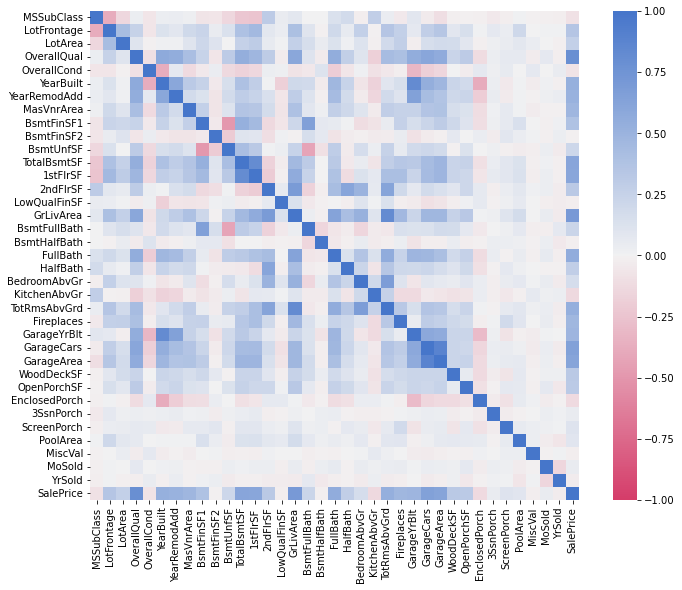

In [3]:
"""
for col in df.columns: 
    if ((df.dtypes[col] == 'int64' or df.dtypes[col] == 'float64') and df[col].isnull().sum() == 0):
        df.plot.scatter(x=col, y='SalePrice', xlim = (df[col].min()-1, df[col].max()+1), ylim=(0,800000))
"""
"""
for col in df.columns: 
    data = pd.concat([df['SalePrice'], df[col]], axis=1)
    f, ax = plt.subplots(figsize=(20,20))
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    fig.axis(ymin=df['SalePrice'].min(), ymax=df['SalePrice'].max());
"""

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), square=True, vmax=1, vmin=-1, cmap=sns.diverging_palette(0, 255, n = 255))


## Keeping Important Features

In [4]:

"""
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, annot=True, cbar=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

new_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set()
sns.pairplot(df[new_cols], size=2.5) 
plt.show()
"""

important_feature = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

## Missing Data

In [5]:
total = df.isnull().sum().sort_values(ascending=False) 
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
missing_data.head(20)

# Discard PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage (Missing >= 15% data)
# Discard Garage and Bsmt feature due to GarageCars and TotalBsmtSF
# Discard one Eletrical Data

df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)

C:\Users\ACER\AppData\Local\Temp\ipykernel_26456\11037085.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)


## Outliers

In [6]:
"""
for col in important_feature:
    
    data = pd.concat([df['SalePrice'], df[col]], axis=1)
    f, ax = plt.subplots(figsize=(9,9))
    fig = sns.boxplot(x=col, y="SalePrice", data=data)
    fig.axis(ymin=df['SalePrice'].min(), ymax=df['SalePrice'].max())
    
    feat = pd.unique(df[col])
    for ft in feat: 
        data = pd.concat([df[col], df['SalePrice']], axis=1)
        dt = data['SalePrice'][data[data[col] == ft].index]
        print(dt)
        Q1, Q3 = dt.quantile([0.25, 0.75])
        IQR = Q3 - Q1; 
        Q1 -= 1.5 * IQR 
        Q3 += 1.5 * IQR 
        outlier = dt[dt >= Q3].index.union(dt[dt <= Q1].index)
        df = df.drop(index = outlier, axis = 1)

 """       

'\nfor col in important_feature:\n    \n    data = pd.concat([df[\'SalePrice\'], df[col]], axis=1)\n    f, ax = plt.subplots(figsize=(9,9))\n    fig = sns.boxplot(x=col, y="SalePrice", data=data)\n    fig.axis(ymin=df[\'SalePrice\'].min(), ymax=df[\'SalePrice\'].max())\n    \n    feat = pd.unique(df[col])\n    for ft in feat: \n        data = pd.concat([df[col], df[\'SalePrice\']], axis=1)\n        dt = data[\'SalePrice\'][data[data[col] == ft].index]\n        print(dt)\n        Q1, Q3 = dt.quantile([0.25, 0.75])\n        IQR = Q3 - Q1; \n        Q1 -= 1.5 * IQR \n        Q3 += 1.5 * IQR \n        outlier = dt[dt >= Q3].index.union(dt[dt <= Q1].index)\n        df = df.drop(index = outlier, axis = 1)\n\n '

In [7]:
print(df)
print(df.shape)

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
0       Inside   

## Normalize Data

Log-e Normalization

In [8]:
"""
for col in df.columns: 
    if df.dtypes[col] == 'int64' or df.dtypes[col] == 'float64':
        df[col] = np.log(df[col])
"""

"\nfor col in df.columns: \n    if df.dtypes[col] == 'int64' or df.dtypes[col] == 'float64':\n        df[col] = np.log(df[col])\n"

Linear Scaling Normalization

In [9]:
mean = {}
std = {}

for col in df.columns: 
    if df.dtypes[col] == 'int64' or df.dtypes[col] == 'float64':
        mean[col] = np.mean(df[col]) 
        std[col] = np.std(df[col]) 
        df[col] = (df[col] - mean[col]) / std[col]

In [10]:
print(mean)

{'MSSubClass': 56.88142563399589, 'LotArea': 10517.363947909527, 'OverallQual': 6.100068540095956, 'OverallCond': 5.575736806031529, 'YearBuilt': 1971.244002741604, 'YearRemodAdd': 1984.8505825908155, 'BsmtFinSF1': 443.943797121316, 'BsmtFinSF2': 46.58122001370802, 'BsmtUnfSF': 567.3660041124058, 'TotalBsmtSF': 1057.8910212474298, '1stFlrSF': 1162.9067854694997, '2ndFlrSF': 346.79163810829334, 'LowQualFinSF': 5.848526387936943, 'GrLivArea': 1515.54694996573, 'BsmtFullBath': 0.42563399588759426, 'BsmtHalfBath': 0.05757368060315284, 'FullBath': 1.5647703906785468, 'HalfBath': 0.3824537354352296, 'BedroomAbvGr': 2.866346812885538, 'KitchenAbvGr': 1.0466072652501714, 'TotRmsAbvGrd': 6.517477724468814, 'Fireplaces': 0.6134338588074023, 'GarageCars': 1.7669636737491432, 'GarageArea': 473.0301576422207, 'WoodDeckSF': 94.24057573680604, 'OpenPorchSF': 46.692254969156956, 'EnclosedPorch': 21.969156956819738, '3SsnPorch': 3.4119259766963674, 'ScreenPorch': 15.07128169979438, 'PoolArea': 2.760795

## Others

 Get Dummies

In [11]:
df = pd.get_dummies(df)
print(df)

      MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.073732 -0.207125     0.650852    -0.517424   1.051899      0.879449   
1      -0.871979 -0.091909    -0.072372     2.178727   0.157540     -0.428864   
2       0.073732  0.073401     0.650852    -0.517424   0.985650      0.830993   
3       0.310159 -0.096918     0.650852    -0.517424  -1.863050     -0.719600   
4       0.073732  0.374967     1.374077    -0.517424   0.952526      0.734081   
...          ...       ...          ...          ...        ...           ...   
1455    0.073732 -0.260525    -0.072372    -0.517424   0.919401      0.734081   
1456   -0.871979  0.266263    -0.072372     0.381293   0.223789      0.152608   
1457    0.310159 -0.147814     0.650852     3.077444  -1.001815      1.024817   
1458   -0.871979 -0.080187    -0.795596     0.381293  -0.703695      0.540256   
1459   -0.871979 -0.058145    -0.795596     0.381293  -0.206829     -0.961880   

      BsmtFinSF1  BsmtFinSF

# Linear Regression

## Setting Up

In [12]:
df = df.sample(frac=1).reset_index(drop=True)
y = df['SalePrice'].to_numpy()
X = df.drop(['SalePrice'], axis=1).to_numpy()
X = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)
print(X)

[[ 1.         -0.87197875 -0.34598533 ...  0.          1.
   0.        ]
 [ 1.         -0.87197875 -0.45258527 ...  0.          1.
   0.        ]
 [ 1.         -0.1626959  -0.23497712 ...  0.          1.
   0.        ]
 ...
 [ 1.         -0.1626959   0.18440948 ...  0.          1.
   0.        ]
 [ 1.         -0.87197875 -0.15202153 ...  0.          1.
   0.        ]
 [ 1.         -0.63555113 -0.17556569 ...  0.          0.
   0.        ]]


## Linear Regression Class

In [13]:
class LinearRegression: 

    theta = [] 
    loss = []

    def CostFunction(self, X, y, theta): 
        new_y = np.dot(X, theta) 
        return np.sum((new_y - y) ** 2) / X.shape[0]

    def GradientDescent(self, X, y, theta): 
        theta_var = torch.tensor(theta, requires_grad=True) 
        X = torch.tensor(X) 
        y = torch.tensor(y) 
        Y = (1 / X.shape[0]) * torch.dot(torch.matmul(X, theta_var) - y, torch.matmul(X, theta_var) - y)
        Y.backward()
        return theta_var.grad.numpy()

    def fit(self, X, y, alpha = 0.001, eps = 0.00001): 
        theta = np.random.rand(X.shape[1])
        this_cost = self.CostFunction(X, y, theta) 
        loss = [this_cost]
        cost_dif = np.inf 
        iteration = 1

        while (cost_dif > eps and iteration < 1000000):
            grad = self.GradientDescent(X, y, theta) 
            theta = theta - alpha * grad 
            next_cost = self.CostFunction(X, y, theta) 
            cost_dif = abs(next_cost - this_cost) 
            this_cost = next_cost 
            loss.append(this_cost)
            iteration += 1
        
        self.theta = theta 
        self.loss = loss      

## Training With Cross-Validation

This model uses the classic KFold method. Keep in mind that there are still other methods like GroupKFold and StratifiedKFold. 

In [14]:
class TrainWithCVKFold:
    
    k = 0
    theta_best = []
    loss_best = np.inf 

    def __init__(self, k): 
        self.k = k 
        return 

    def set_k(self, k): 
        self.k = k 
        return 

    def fit(self, X, y): 
        # Split
        LR = LinearRegression() 
        group = [] 
        L = 0 
        R = int(X.shape[0] / self.k) - 1
        while L < X.shape[0]: 
            group.append([L, R]) 
            L = R + 1 
            R = min(X.shape[0]-1, R + int(X.shape[0] / self.k)) 

        # Train 
        for [L,R] in group: 
            Xtest = np.array(X[L:R][:])
            ytest = np.array(y[L:R])
            Xtrain = []
            ytrain = []
            if L != 0: 
                for i in range(L): 
                    Xtrain.append(X[i][:]) 
                    ytrain.append(y[i])
            
            if R != X.shape[0]: 
                for i in range(R+1, X.shape[0]): 
                    Xtrain.append(X[i][:]) 
                    ytrain.append(y[i])

            Xtrain = np.array(Xtrain)
            ytrain = np.array(ytrain)

            LR.fit(X=Xtrain,y=ytrain)
            cost = LR.CostFunction(X=Xtest, y=ytest, theta=LR.theta)
            if cost < self.loss_best: 
                self.theta_best = LR.theta 
                self.loss_best = cost 
            


In [15]:
# k_list = [] 
# cost_list = []
best_theta = []
best_cost = np.inf
# fig, axis = plt.subplots(figsize=(20,20))
for k in range(2, 11): 
    CVTrain = TrainWithCVKFold(k)
    CVTrain.fit(X=X, y=y) 
    # k_list.append(k) 
    # cost_list.append(CVTrain.loss_best)
    if (CVTrain.loss_best < best_cost): 
        best_theta = CVTrain.theta_best
        best_cost = CVTrain.loss_best 

print(best_theta)

C:\Users\ACER\AppData\Local\Temp\ipykernel_26456\1862151724.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((new_y - y) ** 2) / X.shape[0]


## Prediction

In [ ]:
df_test = pd.read_csv("test.csv")

for col in df.columns: 
    if col == 'SalePrice': 
        continue
    if df.dtypes[col] == 'int64' or df.dtypes[col] == 'float64': 
        df_test[col] = (df_test[col] - np.ones(df_test.shape[0]) * mean[col]) / std[col]
df_test = pd.get_dummies(df_test)

df_test_real = pd.DataFrame()
cnt_col = 0
for col in df.columns: 
    if col in df_test.columns: 
        df_test_real = pd.concat([df_test_real, df_test[col]], axis=1)
    else: 
        df_test_real[col] = 0

X_real = df_test_real.to_numpy()
y_real = np.dot(X_real, best_theta)
y_real = y_real * std['SalePrice'] + np.ones(X_real.shape[0]) * mean['SalePrice']
print(y_real)

{'MSSubClass': -7.891981181729716e-17, 'LotArea': 7.476313376930887e-18, 'OverallQual': 3.752995173030344e-16, 'OverallCond': -1.4853703523429098e-16, 'YearBuilt': -3.239811891462691e-15, 'YearRemodAdd': 5.2791523342285715e-15, 'BsmtFinSF1': -7.731230932276621e-17, 'BsmtFinSF2': 4.0101955721552945e-17, 'BsmtUnfSF': -8.499788337945852e-17, 'TotalBsmtSF': -2.1496778920946314e-17, '1stFlrSF': -1.311303514177725e-16, '2ndFlrSF': 6.8485313376466135e-18, 'LowQualFinSF': -6.112123981868001e-16, 'GrLivArea': 3.3177329591265814e-17, 'BsmtFullBath': -2.591788637336041e-16, 'BsmtHalfBath': 6.065896395338886e-16, 'FullBath': 1.184034973486459e-16, 'HalfBath': 1.1353343061965275e-16, 'BedroomAbvGr': 1.0348891799110437e-16, 'KitchenAbvGr': 2.7911569940541973e-16, 'TotRmsAbvGrd': -8.82699594630008e-17, 'Fireplaces': 1.7288736887925672e-16, 'GarageCars': 9.648819706817673e-17, 'GarageArea': 9.937979918851641e-17, 'WoodDeckSF': -1.1551189522830621e-16, 'OpenPorchSF': -2.6252703460978684e-17, 'EnclosedP

C:\Users\ACER\AppData\Local\Temp\ipykernel_26964\3713188753.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_real[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_26964\3713188753.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_real[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_26964\3713188753.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conc

[-1981.74765138 -2808.3703693  -2380.90333423 ... -4199.72386942
 -1844.39030812 -1123.94850619]


C:\Users\ACER\AppData\Local\Temp\ipykernel_26964\3713188753.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_real[col] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_26964\3713188753.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_real[col] = 0


## Output

In [ ]:
results = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_real}) 
results.to_csv('results.csv')